In [ ]:
# @title Importation de la base de données d'images
!git clone https://github.com/Learza7/deep_learning_project.git

Cloning into 'deep_learning_project'...
remote: Enumerating objects: 1836, done.
remote: Counting objects: 100% (858/858), done.
remote: Compressing objects: 100% (800/800), done.
remote: Total 1836 (delta 94), reused 799 (delta 56), pack-reused 978
Receiving objects: 100% (1836/1836), 56.02 MiB | 30.84 MiB/s, done.
Resolving deltas: 100% (210/210), done.


In [ ]:
!pip install opencv-python-headless
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
# Matrice de Confusion
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# @title Importation et chargement des images
def load_data():

    emotions = ["angry", "sad", "fearful", "happy", "surprised"]

    images = []
    labels = []

    folder = "/content/deep_learning_project/emotion_images/train/"

    for emotion in emotions:
      for file in os.listdir(os.path.join(folder, emotion)):
          img_path = os.path.join(folder + '/' + emotion, file)
          img = cv2.imread(img_path)
          img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir l'image en format RGB
          images.append(img_rgb)
          #images.append(img)
          labels.append(emotion)

    return images, labels

# Preprocess the data
def preprocess_data(images, labels, img_size=(128, 128)):
    # Resize images and normalize pixel values
    resized_images = [cv2.resize(img, img_size) for img in images]
    X = np.array(resized_images, dtype=np.float32) / 255.0

    # Encode labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(labels)
    return X, y

def load_validation_data():

    emotions = ["angry", "sad", "fearful", "happy", "surprised"]

    images = []
    labels = []

    folder = "/content/deep_learning_project/emotion_images/validation/"

    for emotion in emotions:
      for file in os.listdir( os.path.join(folder, emotion)):
          img_path = os.path.join(folder + '/' + emotion, file)
          img = cv2.imread(img_path)
          img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertir l'image en format RGB
          images.append(img_rgb)
          labels.append(emotion)

    return images, labels

In [ ]:
# @title Création de notre réseau de neurones convolutif
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.BatchNormalization()) #régularisation

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    #model.add(layers.Dropout(0.5)) #régularisation
    
    model.add(layers.Dense(5, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['sparse_categorical_accuracy'],
                  )

    return model

In [ ]:
# @title Initialisation paramètres pour entrainement
tf.config.list_physical_devices('GPU')

# Load data
images, labels = load_data()
images_validation, labels_validation = load_validation_data()

# Preprocess data
x, y = preprocess_data(images, labels)

# Preprocess validation data
x_validation, y_validation = preprocess_data(images_validation, labels_validation)

# Create and train the model
input_shape = (128, 128, 3)


In [ ]:
# @title Accès au drive pour sauvegarde et utilisation des meilleurs poids du réseau
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

!ls /content/drive/MyDrive/best_weights

MessageError: ignored

In [ ]:
# @title Checkpoints permettant la sauvegarde des meilleurs poids du réseaux
# Comme l'entraînement est instable, on déclenche une sauvegarde du modèle à chaque fois que
# la perte de validation atteint un nouveau minimum
model_saver_cnn = ModelCheckpoint('drive/MyDrive/best_weights/best_weights_cnn', monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [ ]:
# @title Premier entrainement
model_cnn = create_cnn_model(input_shape)

history_cnn = model_cnn.fit(x, y, epochs=50, validation_data=(x_validation, y_validation), callbacks = [model_saver_cnn])

Epoch 1/50
24/27 [=========================>....] - ETA: 0s - loss: 1.5441 - sparse_categorical_accuracy: 0.4023
Epoch 1: val_loss did not improve from 1.18021
27/27 [==============================] - 4s 32ms/step - loss: 1.5254 - sparse_categorical_accuracy: 0.4103 - val_loss: 1.5713 - val_sparse_categorical_accuracy: 0.3810
Epoch 2/50
25/27 [==========================>...] - ETA: 0s - loss: 0.9791 - sparse_categorical_accuracy: 0.6350
Epoch 2: val_loss did not improve from 1.18021
27/27 [==============================] - 1s 23ms/step - loss: 0.9846 - sparse_categorical_accuracy: 0.6352 - val_loss: 1.5320 - val_sparse_categorical_accuracy: 0.3810
Epoch 3/50
25/27 [==========================>...] - ETA: 0s - loss: 0.7045 - sparse_categorical_accuracy: 0.7675
Epoch 3: val_loss did not improve from 1.18021
27/27 [==============================] - 1s 23ms/step - loss: 0.7043 - sparse_categorical_accuracy: 0.7656 - val_loss: 1.5406 - val_sparse_categorical_accuracy: 0.3810
Epoch 4/50
25/27

In [ ]:
# @title Analyse des résultats
def plot_training_analysis(history,model):
  acc = history.history['sparse_categorical_accuracy']
  val_acc = history.history['val_sparse_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

  # Evaluate the model on the training data
  train_loss, train_accuracy = model.evaluate(x, y, verbose=2)

  # Display the training accuracy and loss
  print(f"Training accuracy: {train_accuracy * 100:.2f}%")
  print(f"Training loss: {train_loss * 100:.2f}%")

  # Evaluate the model on the validation data
  train_loss_val, train_accuracy_val = model.evaluate(x_validation, y_validation, verbose=2)

  # Display the evaluation accuracy and loss
  print(f"Evaluation accuracy: {train_accuracy_val * 100:.2f}%")
  print(f"Evaluation loss: {train_loss_val * 100:.2f}%")

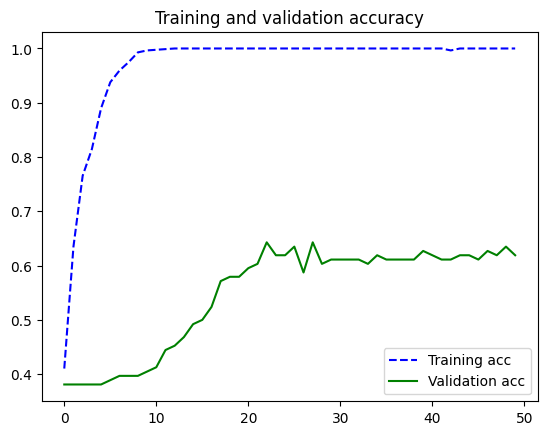

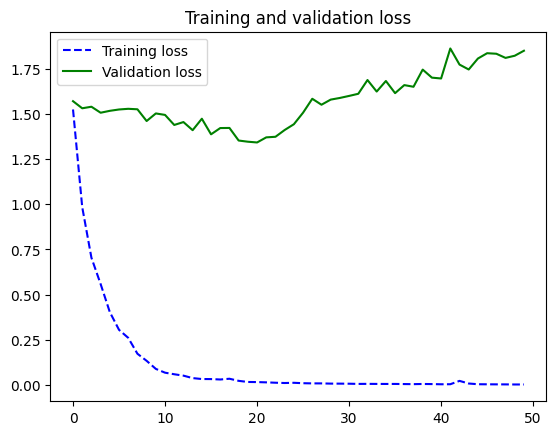

27/27 - 0s - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - 247ms/epoch - 9ms/step
Training accuracy: 100.00%
Training loss: 0.16%
4/4 - 0s - loss: 1.8507 - sparse_categorical_accuracy: 0.6190 - 57ms/epoch - 14ms/step
Evaluation accuracy: 61.90%
Evaluation loss: 185.07%


In [ ]:
# @title Analyse des résultats du premier entrainement
plot_training_analysis(history_cnn,model_cnn)

4/4 [==============================] - 0s 9ms/step


<Axes: >

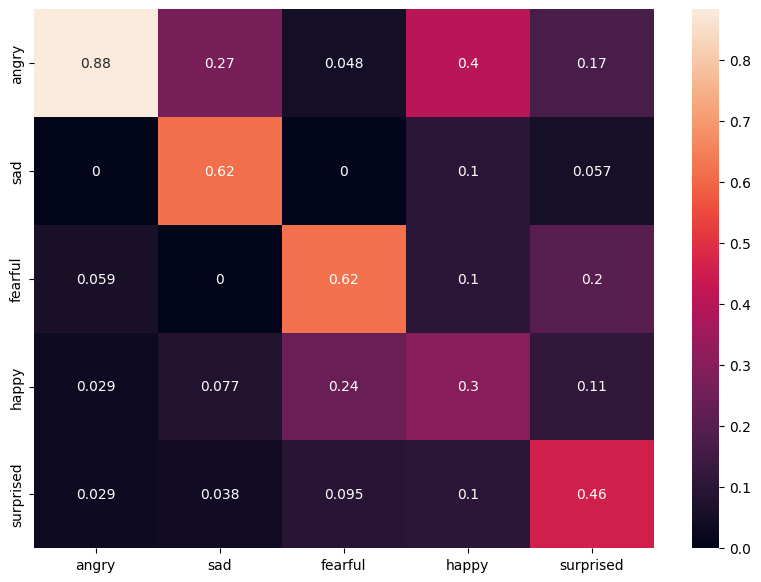

In [ ]:
# @title Matrice de confusion après premier entrainement
#Predict
y_prediction_cnn = model_cnn.predict(x_validation)
y_prediction_cnn = np.argmax (y_prediction_cnn, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result_cnn = confusion_matrix(y_validation, y_prediction_cnn , normalize='pred')

emotions = ["angry", "sad", "fearful", "happy", "surprised"]

df_cm = pd.DataFrame(result_cnn, index = [i for i in emotions],
                    columns = [i for i in emotions])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

[  1   2   7   8   9  13  14  15  16  20  23  26  30  31  34  37  39  41
  49  50  51  52  53  54  55  56  58  59  60  62  65  79  81  83  84  87
  89  90  95  98  99 102 103 107 111 120 123 124]
48


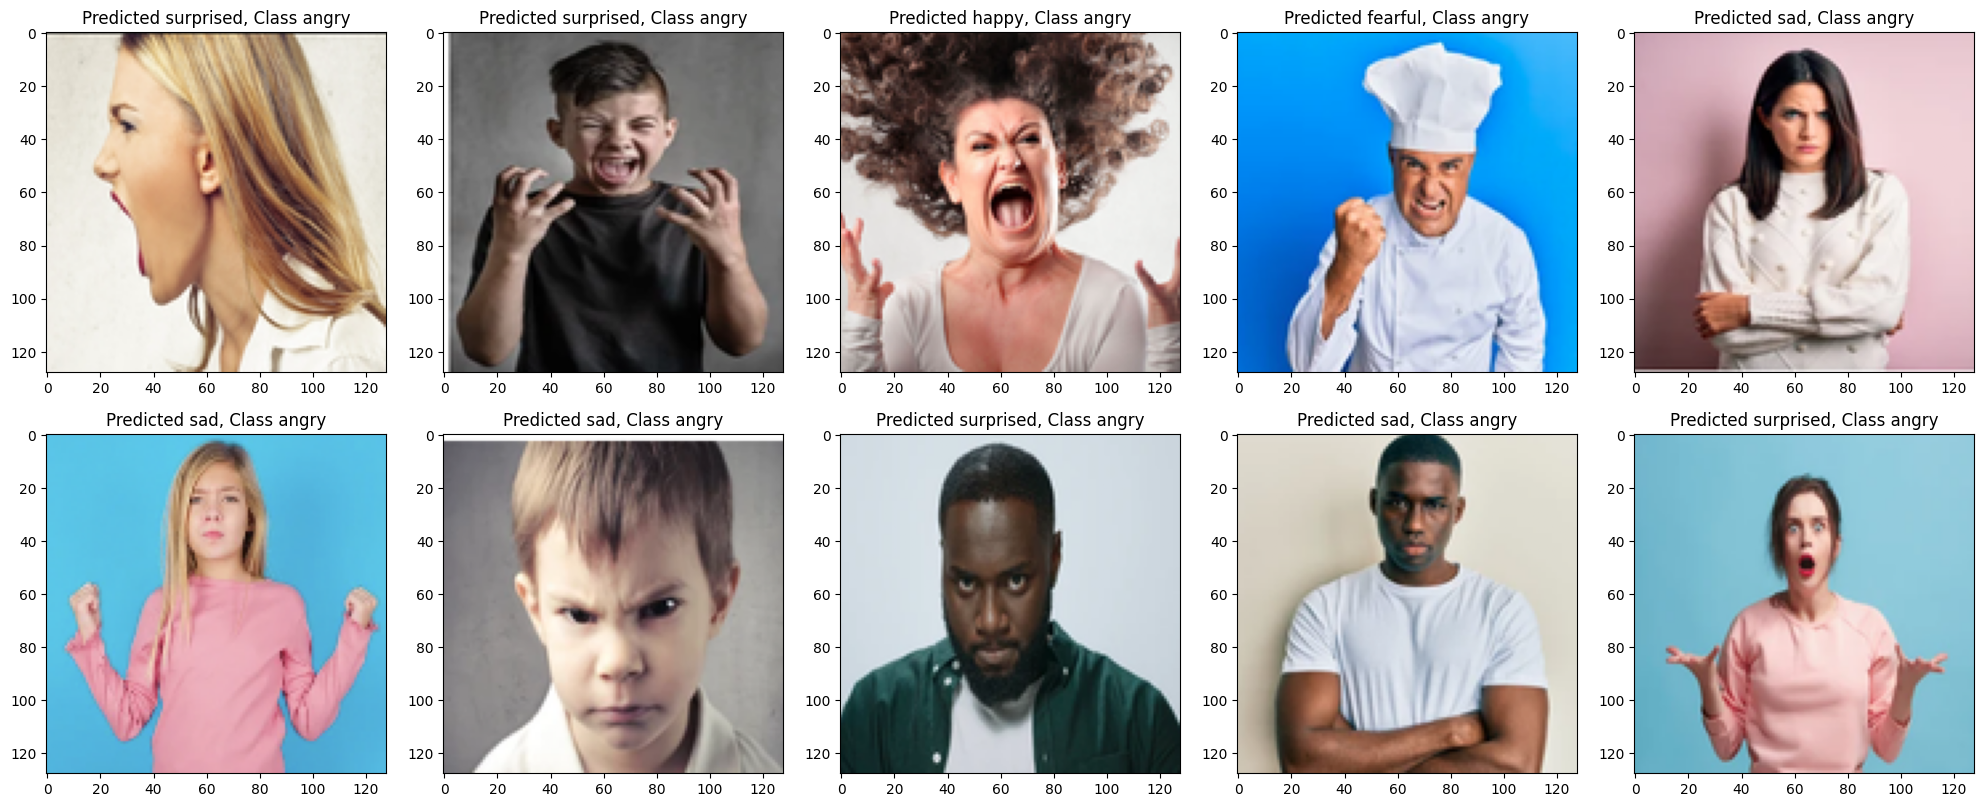

In [ ]:
# @title Illustration de mauvaises prédictions après le premier entrainement
## find some misclassified examples
misclassified_idx_cnn = np.where(y_prediction_cnn != y_validation)[0]
print(misclassified_idx_cnn)
print(len(misclassified_idx_cnn))

CLASSES = ["angry", "sad", "fearful", "happy", "surprised"]

## display the first 10 misclassified examples
plt.figure(figsize=(20, 20))
for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    plt.title("Predicted {}, Class {}".format(CLASSES[y_prediction_cnn[misclassified_idx_cnn[i]]], CLASSES[int(y_validation[misclassified_idx_cnn[i]])]))
    plt.imshow(x_validation[misclassified_idx_cnn[i]])
plt.tight_layout()
plt.show()

## Augmentation de la base de données

In [ ]:
# @title Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,          # rotation
    width_shift_range=0.15,      # largeur
    height_shift_range=0.15,     # hauteur
    shear_range=0.3,            # cisaillement
    zoom_range=0.3,             # zoom
    horizontal_flip=True,       # symétrie horizontal
    zca_epsilon=1e-4,           # blanchiment
    zca_whitening=True,
    channel_shift_range=0.2)    # saturation

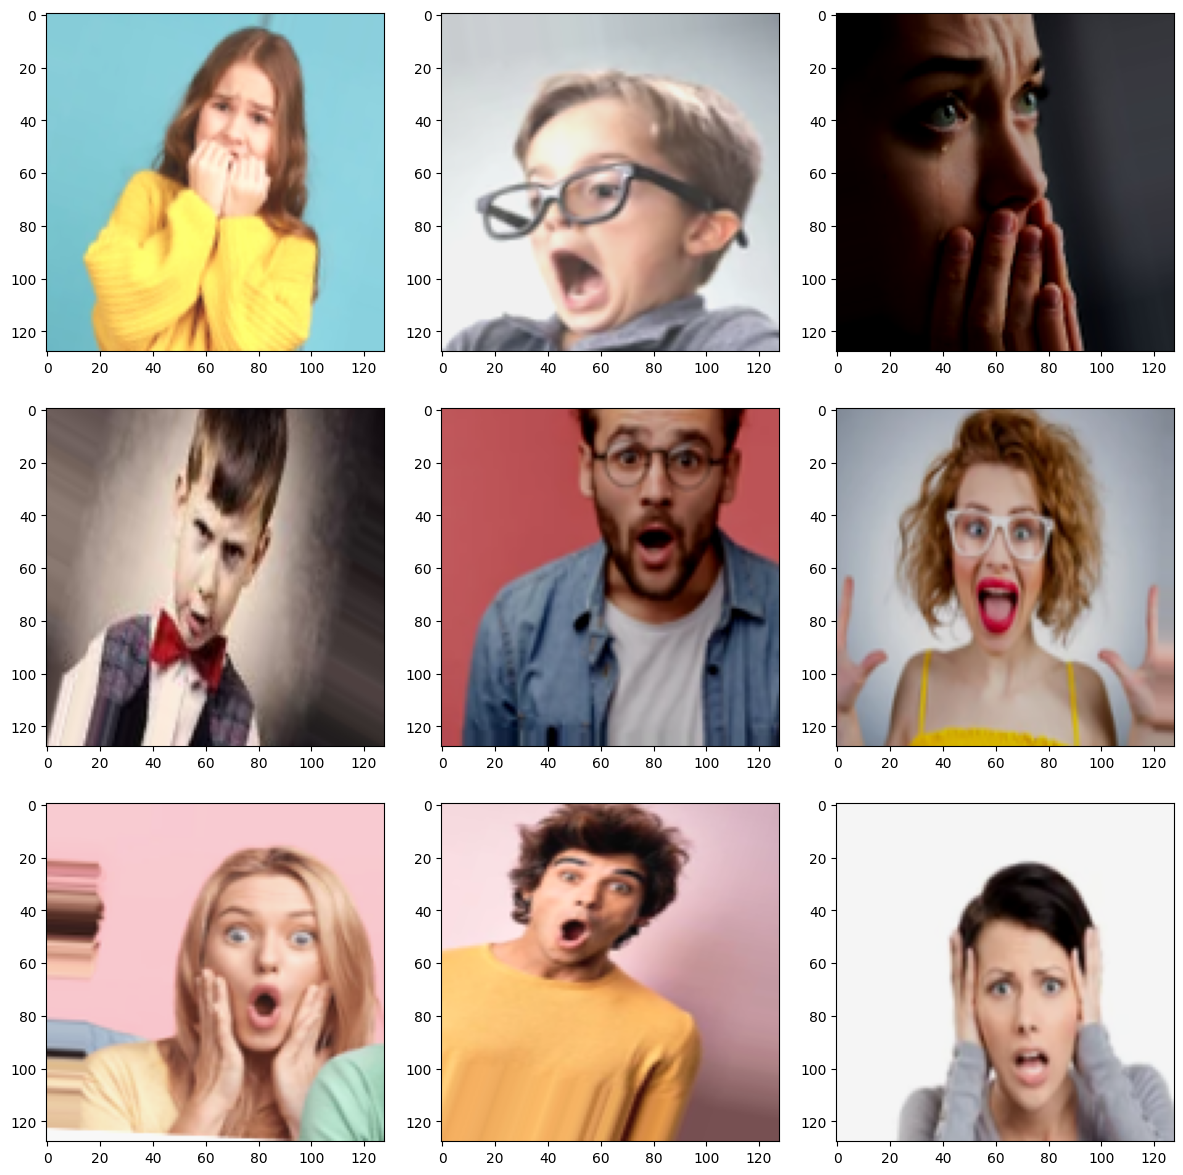

In [ ]:
# @title Exemples de nouvelles images ajoutées à la base de données
example_x, example_y = train_datagen.flow(x, y, batch_size=10).next()

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = example_x[shuffle_indices[i]]
    emotion_index = np.argmax(example_y[shuffle_indices[i]]) # Récupérer l'indice de l'émotion
    #plt.title(labels[emotion_index]) # Utiliser l'indice pour obtenir le nom de l'émotion
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [ ]:
#@title Entrainement après augmentation de la base de données
model_cnn_aug = create_cnn_model(input_shape)

model_cnn_aug.load_weights('/content/drive/MyDrive/best_weights/best_weights_cnn')

history_cnn_aug = model_cnn_aug.fit(train_datagen.flow(x, y, batch_size=10), 
                            validation_data=(x_validation, y_validation),
                            epochs=800,
                            callbacks = [model_saver_cnn])

Epoch 1/800
83/84 [============================>.] - ETA: 0s - loss: 1.2743 - sparse_categorical_accuracy: 0.4734
Epoch 1: val_loss did not improve from 1.18021
84/84 [==============================] - 7s 49ms/step - loss: 1.2807 - sparse_categorical_accuracy: 0.4713 - val_loss: 1.2307 - val_sparse_categorical_accuracy: 0.5317
Epoch 2/800
83/84 [============================>.] - ETA: 0s - loss: 1.2684 - sparse_categorical_accuracy: 0.4867
Epoch 2: val_loss did not improve from 1.18021
84/84 [==============================] - 6s 68ms/step - loss: 1.2640 - sparse_categorical_accuracy: 0.4904 - val_loss: 1.5105 - val_sparse_categorical_accuracy: 0.4921
Epoch 3/800
83/84 [============================>.] - ETA: 0s - loss: 1.2463 - sparse_categorical_accuracy: 0.4915
Epoch 3: val_loss did not improve from 1.18021
84/84 [==============================] - 4s 47ms/step - loss: 1.2431 - sparse_categorical_accuracy: 0.4916 - val_loss: 1.2782 - val_sparse_categorical_accuracy: 0.5556
Epoch 4/800
8

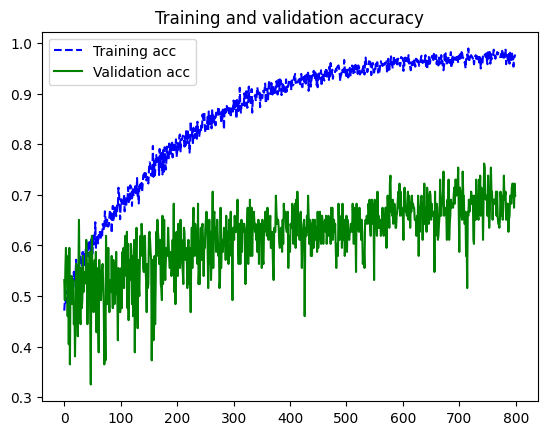

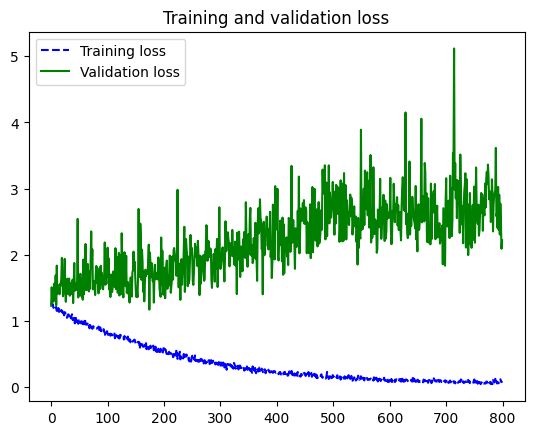

27/27 - 0s - loss: 0.0058 - sparse_categorical_accuracy: 0.9988 - 243ms/epoch - 9ms/step
Training accuracy: 99.88%
Training loss: 0.58%
4/4 - 0s - loss: 2.2197 - sparse_categorical_accuracy: 0.6984 - 53ms/epoch - 13ms/step
Evaluation accuracy: 69.84%
Evaluation loss: 221.97%


In [ ]:
# @title Analyse des résultats de l'entraienment avec augmentation de la base de données
plot_training_analysis(history_cnn_aug,model_cnn_aug)

4/4 [==============================] - 0s 8ms/step


<Axes: >

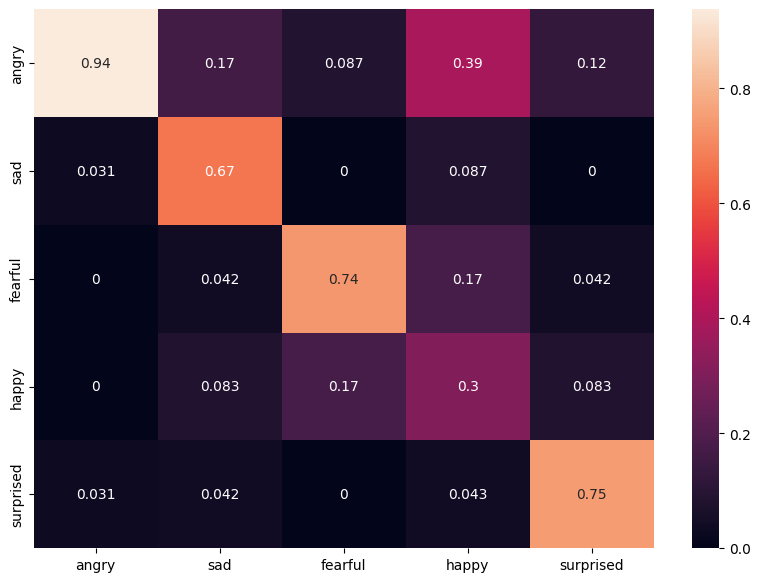

In [ ]:
#@title Matrice de confusion après entrainement avec augmentation de la base de données
#Predict
y_prediction_cnn_aug = model_cnn_aug.predict(x_validation)
y_prediction_cnn_aug = np.argmax (y_prediction_cnn_aug, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_validation, y_prediction_cnn_aug , normalize='pred')

emotions = ["angry", "sad", "fearful", "happy", "surprised"]

df_cm = pd.DataFrame(result, index = [i for i in emotions],
                     columns = [i for i in emotions])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

[  9  13  14  16  20  21  22  23  24  30  31  32  34  35  37  41  43  44
  50  52  53  54  55  56  58  62  65  70  81  83  87  90  93  95  97 109
 115 123]
38


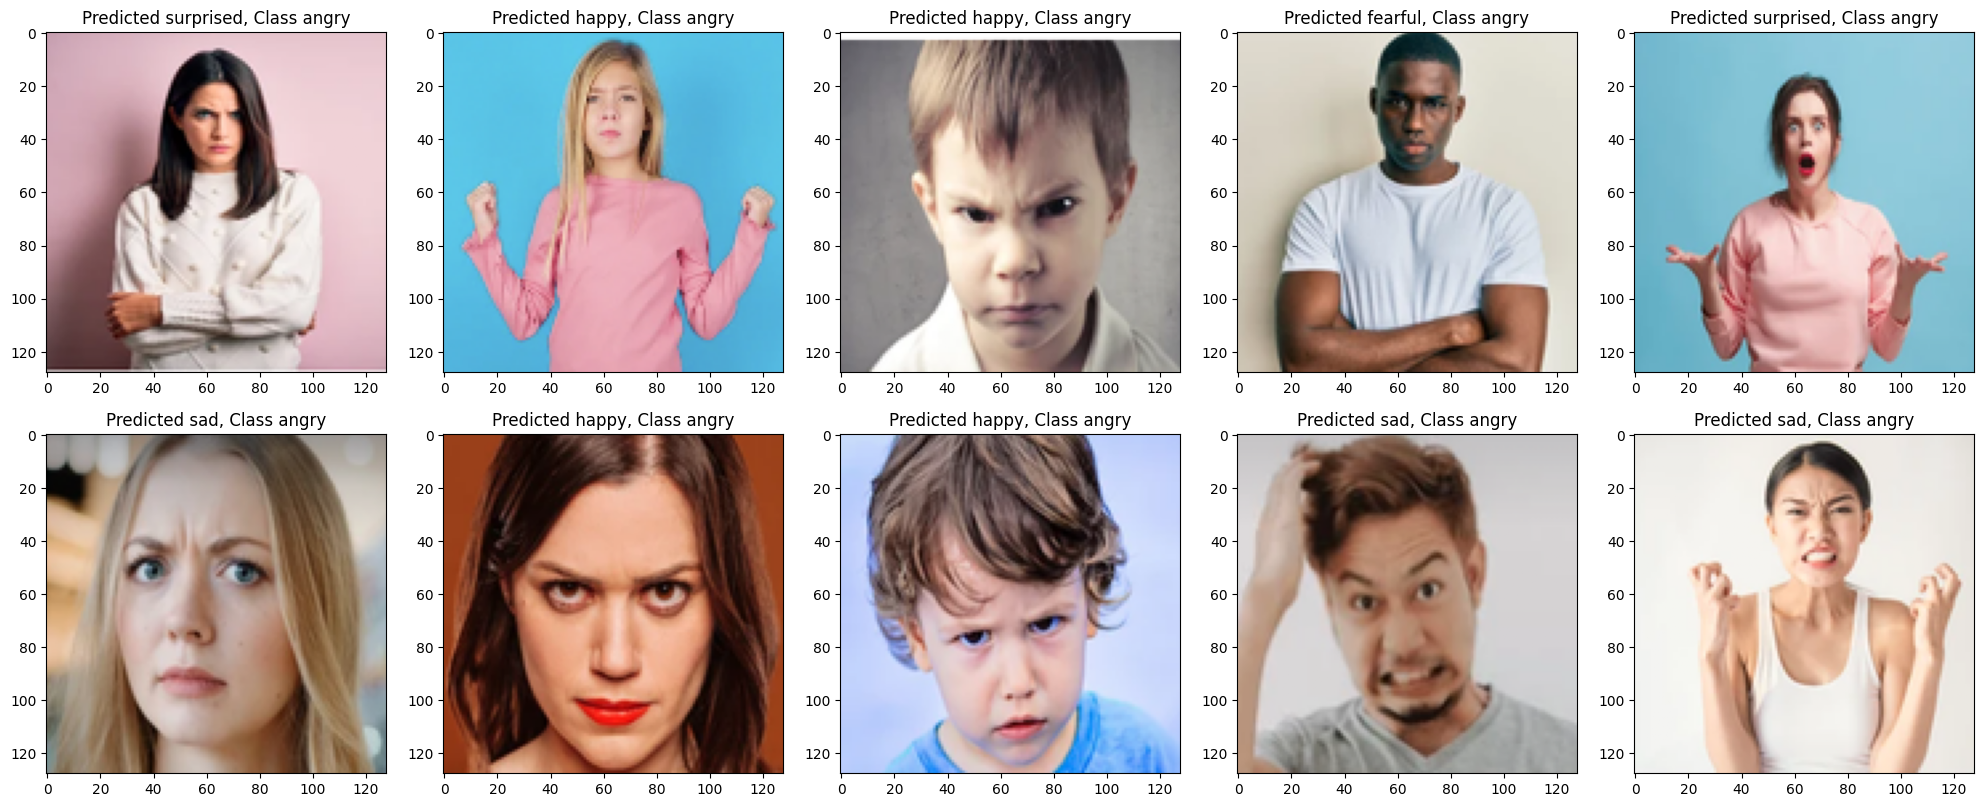

In [ ]:
# @title Illustration de mauvaises prédictions après entrainement avec augmentation de la base de données
## find some misclassified examples
misclassified_idx_cnn_aug = np.where(y_prediction_cnn_aug != y_validation)[0]
print(misclassified_idx_cnn_aug)
print(len(misclassified_idx_cnn_aug))

CLASSES = ["angry", "sad", "fearful", "happy", "surprised"]

## display the first 10 misclassified examples
plt.figure(figsize=(20, 20))
for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    plt.title("Predicted {}, Class {}".format(CLASSES[y_prediction_cnn_aug[misclassified_idx_cnn_aug[i]]], CLASSES[int(y_validation[misclassified_idx_cnn_aug[i]])]))
    plt.imshow(x_validation[misclassified_idx_cnn_aug[i]])
plt.tight_layout()
plt.show()


## Transfer Learning

In [ ]:
# @title Création du réseau de neurones pour transfer learning
from tensorflow.keras.applications import VGG16

base_model_transfer = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model_transfer.trainable = False  # Freeze base model

model_aug_transfer = models.Sequential()
model_aug_transfer.add(base_model_transfer)

model_aug_transfer.add(layers.Flatten())
model_aug_transfer.add(layers.Dense(128, activation='relu'))

model_aug_transfer.add(layers.Dense(5, activation='softmax'))

model_aug_transfer.compile(optimizer=Adam(learning_rate=1e-4),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                           metrics=['sparse_categorical_accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# @title Checkpoint permettant la sauvegarde des meilleurs poids du réseau
model_saver_transfer = ModelCheckpoint('drive/MyDrive/best_weights/best_weights_transfer', monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [ ]:
# @title Entrainement avec augmentation de la base de données et transfer learning
history_aug_transfer = model_aug_transfer.fit(train_datagen.flow(x, y, batch_size=10), 
                                              validation_data=(x_validation, y_validation),
                                              epochs=500
)
                                              #callbacks = [model_saver_transfer])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


84/84 [==============================] - 18s 93ms/step - loss: 1.5330 - sparse_categorical_accuracy: 0.3038 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.3810
Epoch 2/500
84/84 [==============================] - 5s 55ms/step - loss: 1.3048 - sparse_categorical_accuracy: 0.4653 - val_loss: 1.2584 - val_sparse_categorical_accuracy: 0.5159
Epoch 3/500
84/84 [==============================] - 4s 48ms/step - loss: 1.2156 - sparse_categorical_accuracy: 0.5167 - val_loss: 1.3680 - val_sparse_categorical_accuracy: 0.5397
Epoch 4/500
84/84 [==============================] - 4s 47ms/step - loss: 1.1479 - sparse_categorical_accuracy: 0.5443 - val_loss: 1.4283 - val_sparse_categorical_accuracy: 0.4444
Epoch 5/500
84/84 [==============================] - 5s 57ms/step - loss: 1.0924 - sparse_categorical_accuracy: 0.5849 - val_loss: 1.3940 - val_sparse_categorical_accuracy: 0.5238
Epoch 6/500
84/84 [==============================] - 4s 45ms/step - loss: 1.0784 - sparse_categorical_accuracy:

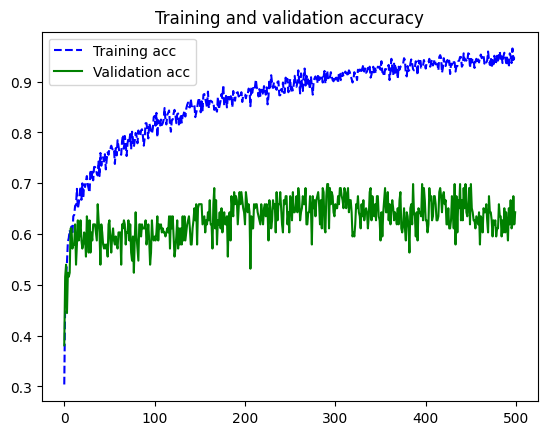

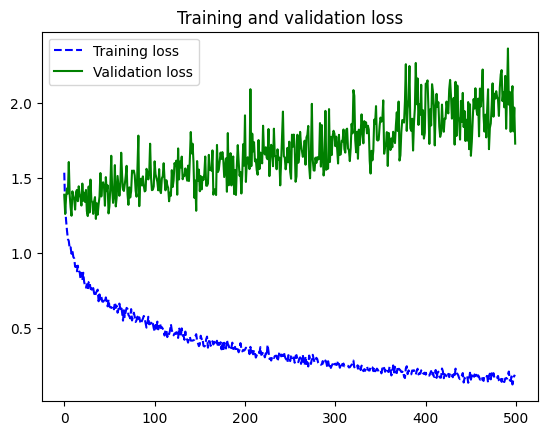

27/27 - 2s - loss: 0.0312 - sparse_categorical_accuracy: 0.9916 - 2s/epoch - 62ms/step
Training accuracy: 99.16%
Training loss: 3.12%
4/4 - 0s - loss: 1.7266 - sparse_categorical_accuracy: 0.6429 - 172ms/epoch - 43ms/step
Evaluation accuracy: 64.29%
Evaluation loss: 172.66%


In [ ]:
# @title Analyse des résultats de l'entrainement avec augmentation de la base de données et transfer learning
plot_training_analysis(history_aug_transfer,model_aug_transfer)

4/4 [==============================] - 0s 55ms/step


<Axes: >

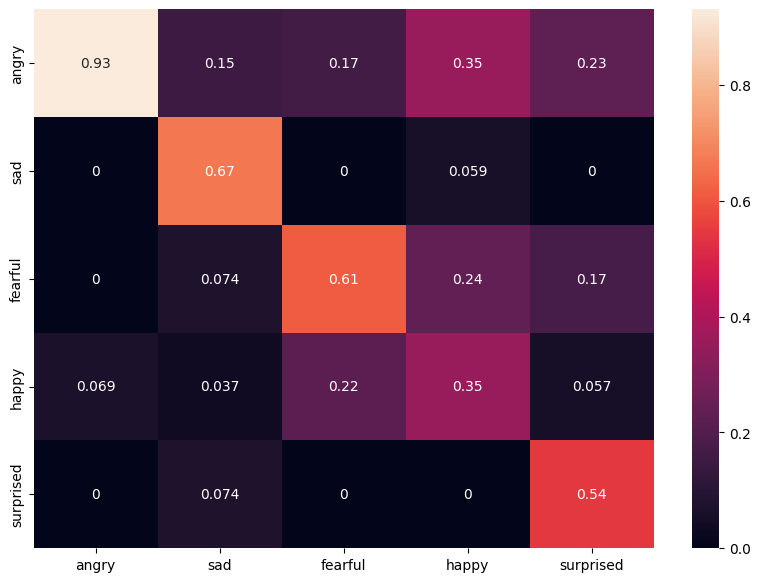

In [ ]:
# @title Matrice de confusion après entrainement avec augmentation de la base de données et transfer learning
#Predict
y_prediction_aug_transfer = model_aug_transfer.predict(x_validation)
y_prediction_aug_transfer = np.argmax (y_prediction_aug_transfer, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result_aug_transfer = confusion_matrix(y_validation, y_prediction_aug_transfer , normalize='pred')

emotions = ["angry", "sad", "fearful", "happy", "surprised"]

df_cm = pd.DataFrame(result_aug_transfer, index = [i for i in emotions],
                    columns = [i for i in emotions])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
# @title Illustration de mauvaises prédictions après entrainement avec augmentation de la base de données et transfer learning
## find some misclassified examples
misclassified_idx_aug_transfer = np.where(y_prediction_aug_transfer != y_validation)[0]
print(misclassified_idx_aug_transfer)
print(len(misclassified_idx_aug_transfer))

CLASSES = ["angry", "sad", "fearful", "happy", "surprised"]

## display the first 10 misclassified examples
plt.figure(figsize=(20, 20))
for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    plt.title("Predicted {}, Class {}".format(CLASSES[y_prediction_aug_transfer[misclassified_idx_aug_transfer[i]]], CLASSES[int(y_validation[misclassified_idx_aug_transfer[i]])]))
    plt.imshow(x_validation[misclassified_idx_aug_transfer[i]])
plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
# @title Fine-Tuning
# Reactivation of the training of the VGG convolutional base parameters 
base_model_transfer.trainable = True

model_aug_transfer.compile(optimizer=Adam(learning_rate=1e-5), # Taux d'apprentissage réduit pour ne pas tout casser, ni risquer le sur-apprentissage !
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                           metrics=['sparse_categorical_accuracy'])

# Load the best weights
#model_aug_transfer.load_weights('/content/drive/MyDrive/best_weights/best_weights_transfer')

# Train the network 
history_aug_transfer_fine = model_aug_transfer.fit(train_datagen.flow(x, y, batch_size=10), 
                                                   validation_data=(x_validation, y_validation),
                                                   epochs=200)
                                                   #callbacks = [model_saver_transfer])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


84/84 [==============================] - 16s 89ms/step - loss: 0.3661 - sparse_categorical_accuracy: 0.8660 - val_loss: 1.7362 - val_sparse_categorical_accuracy: 0.6746
Epoch 2/200
84/84 [==============================] - 6s 68ms/step - loss: 0.2521 - sparse_categorical_accuracy: 0.9031 - val_loss: 2.0249 - val_sparse_categorical_accuracy: 0.5873
Epoch 3/200
84/84 [==============================] - 6s 73ms/step - loss: 0.2440 - sparse_categorical_accuracy: 0.9127 - val_loss: 2.2327 - val_sparse_categorical_accuracy: 0.5079
Epoch 4/200
84/84 [==============================] - 6s 73ms/step - loss: 0.2378 - sparse_categorical_accuracy: 0.9103 - val_loss: 1.7764 - val_sparse_categorical_accuracy: 0.6508
Epoch 5/200
84/84 [==============================] - 6s 65ms/step - loss: 0.2894 - sparse_categorical_accuracy: 0.8840 - val_loss: 2.1494 - val_sparse_categorical_accuracy: 0.5873
Epoch 6/200
84/84 [==============================] - 6s 75ms/step - loss: 0.2268 - sparse_categorical_accuracy:

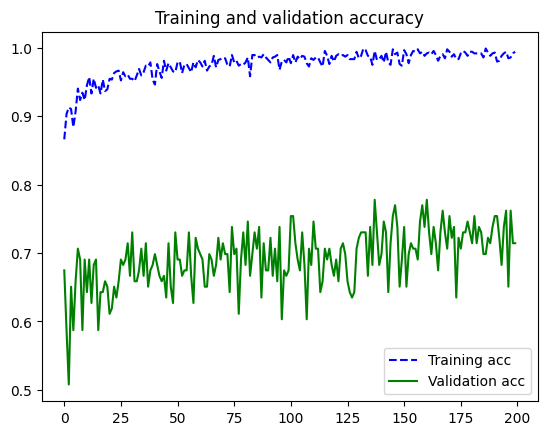

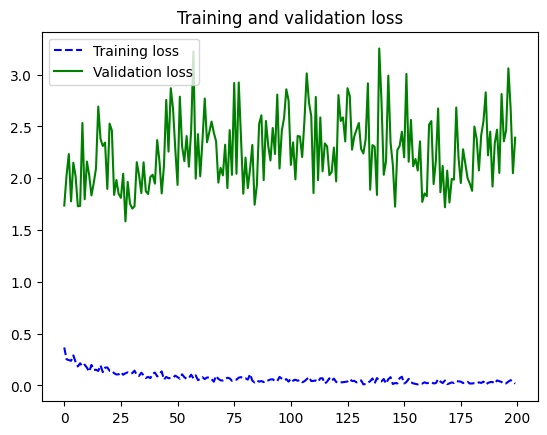

27/27 - 1s - loss: 0.0018 - sparse_categorical_accuracy: 1.0000 - 1s/epoch - 40ms/step
Training accuracy: 100.00%
Training loss: 0.18%
4/4 - 0s - loss: 2.3912 - sparse_categorical_accuracy: 0.7143 - 165ms/epoch - 41ms/step
Evaluation accuracy: 71.43%
Evaluation loss: 239.12%


In [ ]:
# @title Analyse des résultats de l'entrainement avec augmentation de la base de données, transfer learning et fine-tuning
plot_training_analysis(history_aug_transfer_fine,model_aug_transfer)

4/4 [==============================] - 0s 56ms/step


<Axes: >

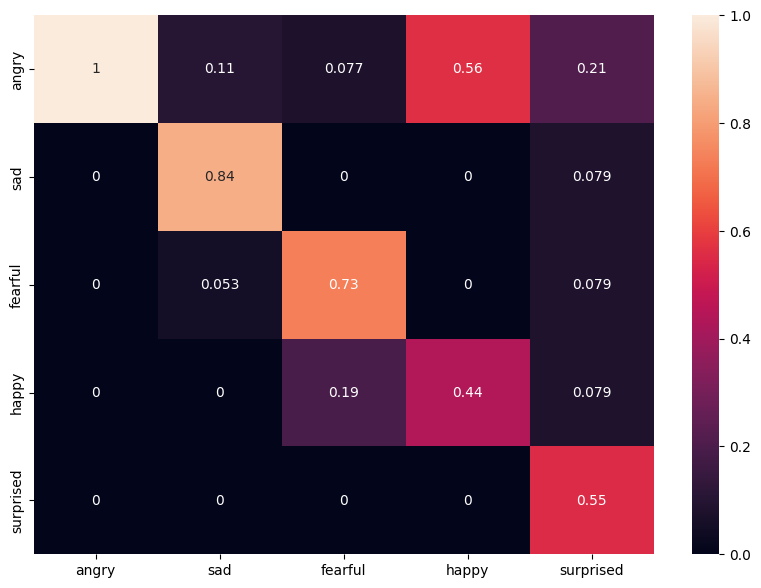

In [ ]:
#@title Matrice de confusion après entrainement avec augmentation de la base de données, transfer learning et fine-tuning
#Predict
y_prediction_aug_transfer_fine = model_aug_transfer.predict(x_validation)
y_prediction_aug_transfer_fine = np.argmax (y_prediction_aug_transfer_fine, axis = 1)

#Create confusion matrix and normalizes it over predicted (columns)
result_aug_transfer_fine = confusion_matrix(y_validation, y_prediction_aug_transfer_fine , normalize='pred')

emotions = ["angry", "sad", "fearful", "happy", "surprised"]

df_cm = pd.DataFrame(result_aug_transfer_fine, index = [i for i in emotions],
                     columns = [i for i in emotions])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

[  0   4   8   9  10  12  15  16  18  21  24  27  30  31  32  39  40  41
  45  46  47  48  49  54  55  58  59  61  62  66  67  72  88  94 100 104]
36


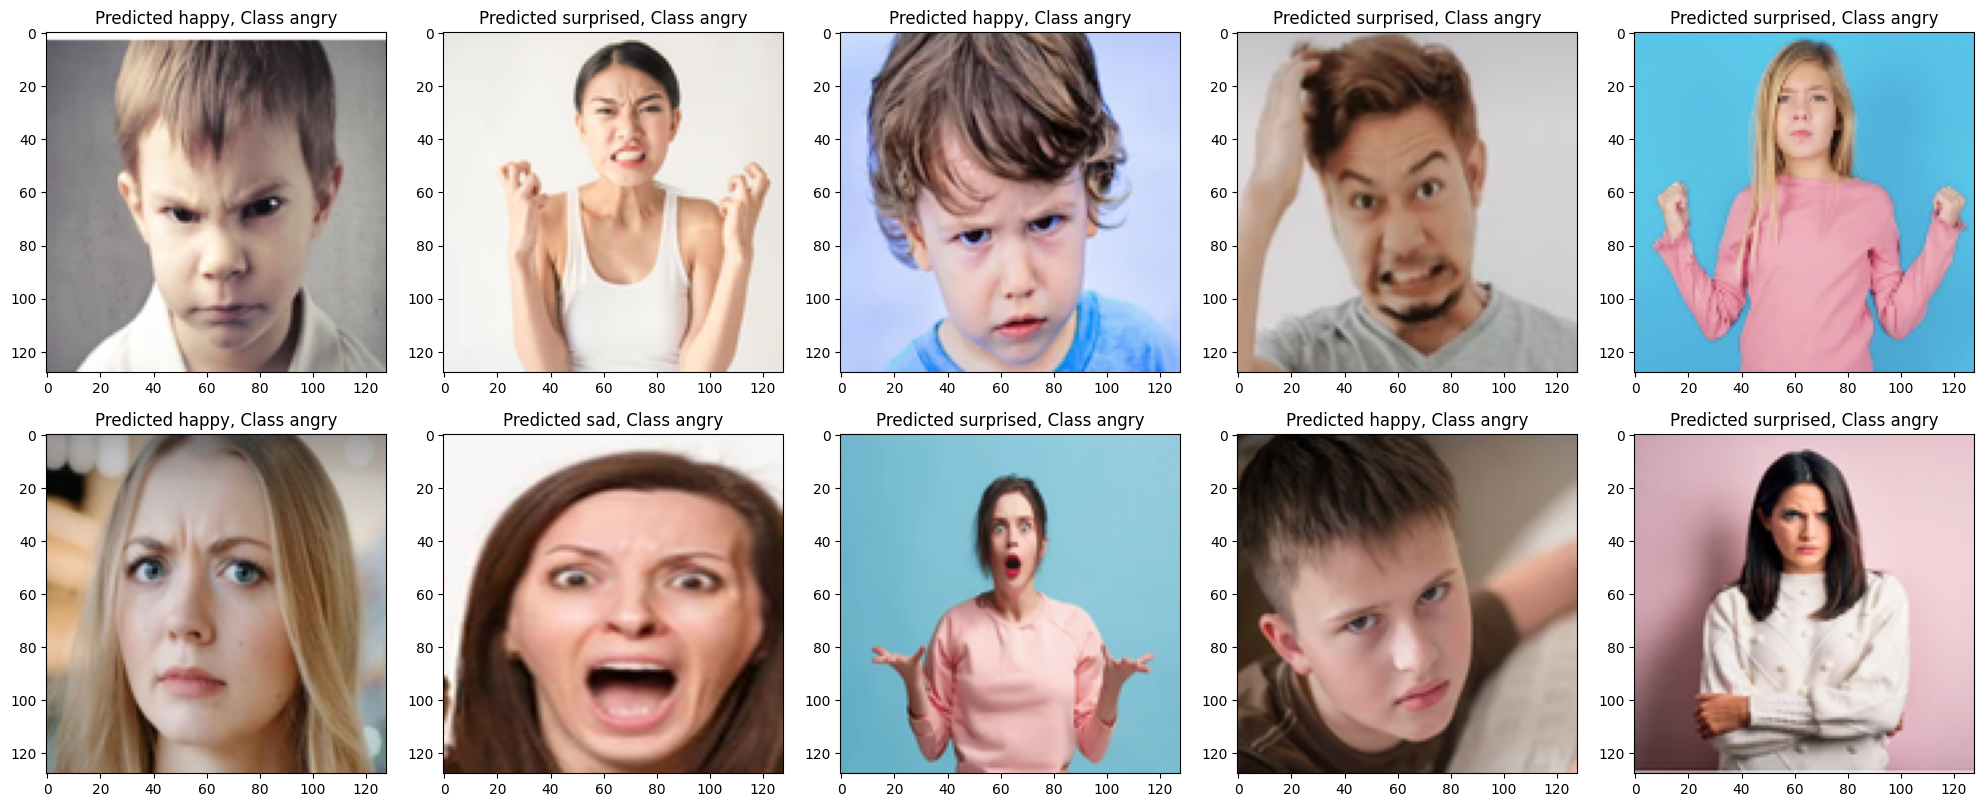

In [ ]:
# @title Illustration de mauvaises prédictions après entrainement avec augmentation de la base de données, transfer learning et fine-tuning
## find some misclassified examples
misclassified_idx_aug_transfer_fine = np.where(y_prediction_aug_transfer_fine != y_validation)[0]
print(misclassified_idx_aug_transfer_fine)
print(len(misclassified_idx_aug_transfer_fine))

CLASSES = ["angry", "sad", "fearful", "happy", "surprised"]

## display the first 10 misclassified examples
plt.figure(figsize=(20, 20))
for i in range(0, 10):
    plt.subplot(5, 5, i+1)
    plt.title("Predicted {}, Class {}".format(CLASSES[y_prediction_aug_transfer_fine[misclassified_idx_aug_transfer_fine[i]]], CLASSES[int(y_validation[misclassified_idx_aug_transfer_fine[i]])]))
    plt.imshow(x_validation[misclassified_idx_aug_transfer_fine[i]])
plt.tight_layout()
plt.show()